In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic #holistic model. Used to make our detections
mp_drawing = mp.solutions.drawing_utils #drawing utilities. Used to draw the detections

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # color conversion. Allows us to change and recolor our images. BGR to RGB
    image.flags.writeable = False #Image is no longer writeable
    results = model.process(image) # detecting the image (our frame from open cv) and making our prediction
    image.flags.writeable = True # image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # color conversion RGB to BGR
    return image, results

def draw_landmarks(image, results): #grab results and render them onto the image
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) #Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #draw right hand connections

In [3]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

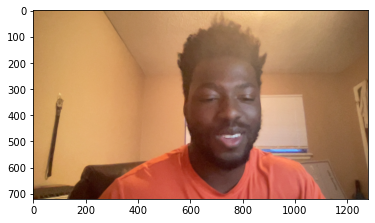

In [4]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [6]:
# Extract Keypoint Values
def extract_keypoints(results):

    # create an array to store pose landmarks
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten(
    ) if results.pose_landmarks else np.zeros(132)

    # hands are not always in the frame, we want to make sure that it will return an array regardless. If there are no left hand landmarks it will
    # return an array of 63 0s. 21 landmarks with an x, y, and z

    # create an array to store lefthand landmarks
    lh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.left_hand_landmarks.landmark]).flatten(
    ) if results.left_hand_landmarks else np.zeros(21*3)

    # hands are not always in the frame, we want to make sure that it will return an array regardless. If there are no left hand landmarks it will
    # return an array of 63 0s. 21 landmarks with an x, y, and z

    # create an array to store righthand landmarks
    rh = np.array([[res.x, res.y, res.z, res.visibility] for res in results.right_hand_landmarks.landmark]).flatten(
    ) if results.right_hand_landmarks else np.zeros(21*3)

    face = np.array([[res.x, res.y, res.z, res.visibility] for res in results.face_landmarks.landmark]).flatten(
    ) if results.face_landmarks else np.zeros(132)

    return np.concatenate([pose, face, lh, rh])


In [8]:

#path for exported data
DATA_PATH = os.path.join('MP_Data')

#actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])
# 30 videos worth of data
no_sequences = 30
# 30 frames per video
sequence_length = 30


for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
                pass

NameError: name 'os' is not defined

In [8]:
# Collect Keypoints for Training and Testing

# accesing our webcam. Access video capture device 0 (this is our webcam)
cap = cv2.VideoCapture(0)
# loop through all the frames in our camera

# set the mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

    # Loop through actions
    for action in actions:
        # loop through the videos
        for sequence in range(no_sequences):
            # loop through video length
            for frame_num in range(sequence_length):

                # reading the frame from our webcam at this point in time
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # draw landmarks
                draw_landmarks(image, results)

                # apply wait logic
                # letting us know when frames are starting to be collected
                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    # telling us what we are collecting frames for
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # take 2 second break between each video
                    cv2.waitKey(2000)

                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12),
                                cv2.FONT_HERSHEY_COMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                # New Export keypoints
                keypoints = extract_keypoints(results)
                # pass keypoints to the path
                npy_path = os.path.join(
                    DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # show the video to the user
                # naming the frame 'Open CV Feed'
                cv2.imshow('OpenCV Feed', image)

            # Break gracefully. If the user presses q on the keyboard it will break out of the loop.
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break

    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
cap.release()
cv2.destroyAllWindows()

In [10]:
#Create Labels and Featurs
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [4]:
#creates a label map, makes hello set to 0, thanks set to 1, and iloveyou set to 2
#loops through all the actions 
label_map = {label:num for num, label in enumerate(actions)}

NameError: name 'actions' is not defined

In [ ]:
# sequences represent x data, labels represent y data
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [ ]:
x = np.array(sequences)
y =to_categorical(labels).astype(int)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

Build and Train Neural Network

In [ ]:
#import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [ ]:
# building the model (sequential)
model = Sequential()
#added 3 LSTM layers
# input shape is the last 2 numbers of x.shape
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
# added 3 Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
#extracting our actions 
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
# compile, and then fit and train the model 
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=150, callbacks=[tb_callback])
model.summary()

Make Predictions

In [ ]:
predictions = model.predict(x_test)

In [ ]:
#find the predicted action
actions[np.argmax(predictions[0])]

In [ ]:
#find the actual action 
actions[np.argmax(y_test[0])]

In [ ]:
#save the model 
model.save('sign_action.h5')

In [ ]:
model.load_weights('sign_action.h5')

TEST THE MODEL IN REAL TIME

In [ ]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        #make a prediction once we have 30 frames of data
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        #only predict once there are 30 frames
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
        # checking if result is above the threshold
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    #checking that the last action does not equal the last sentence
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()
